# Want to understand the customers like who can be easily converge as a Target Customer

### Dataset
* Basic data about customers like Customer ID, age, gender, annual income and spending score. 

In [1]:
# importing required pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',context='notebook',color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from pandas import plotting

import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

### Reading DataSet

In [2]:
data = pd.read_csv('Mall_Customers.csv')
dat = ff.create_table(data.head())
py.iplot(dat)

In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Visualization

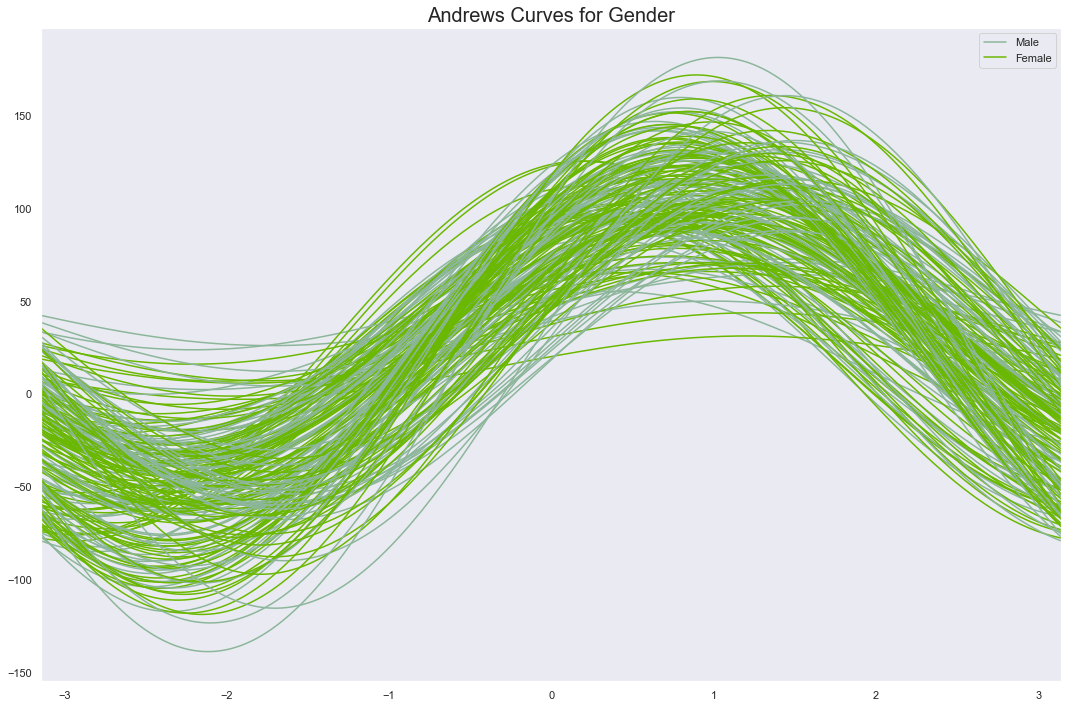

In [7]:
plt.rcParams['figure.figsize']=(15,10)
plotting.andrews_curves(data.drop('CustomerID',axis=1),'Gender')
plt.title('Andrews Curves for Gender',fontsize=20)
plt.tight_layout()
plt.show()

* It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

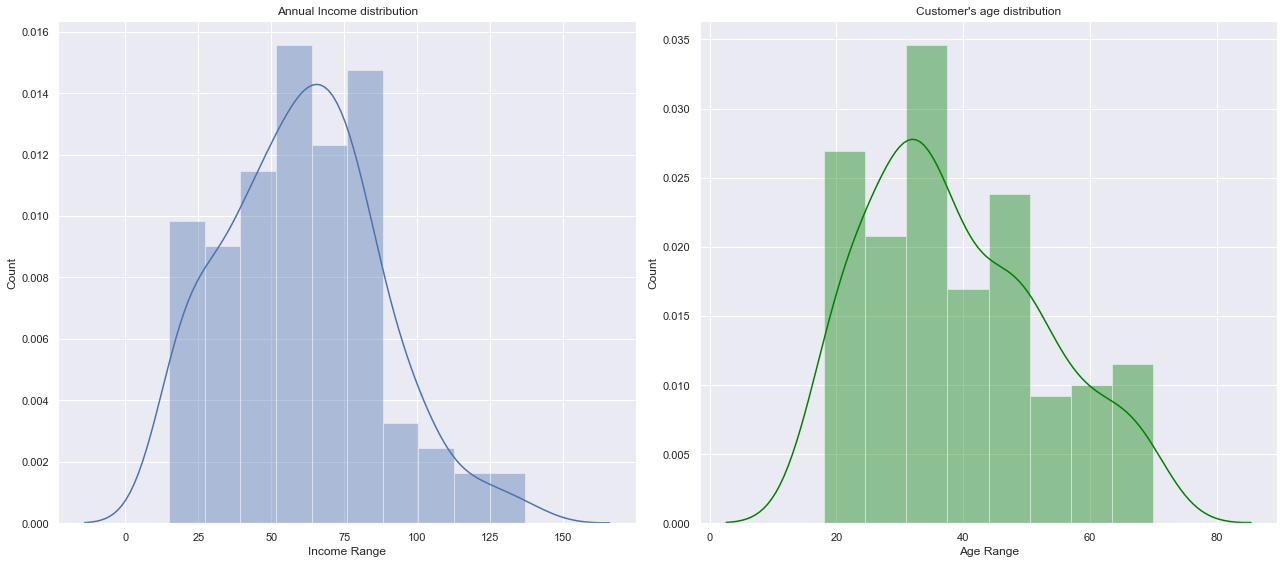

In [8]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.distplot(data['Annual Income (k$)'],kde=True)
plt.title('Annual Income distribution')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(122)
sns.distplot(data['Age'],kde=True,color='green')
plt.title("Customer's age distribution")
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,**

   * we can infer one thing that there are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

**Taking inferences about the Customers.**

   * The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in number as compared to the Middle aged people.

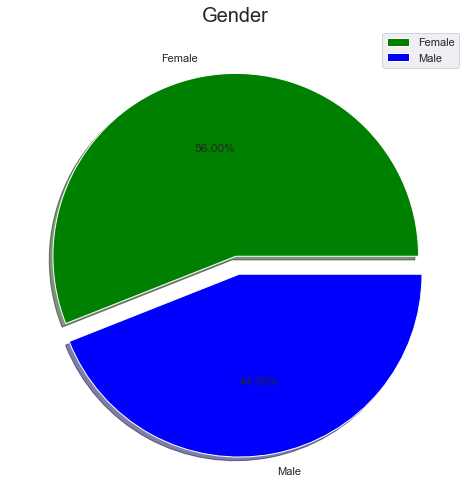

In [9]:
plt.figure(figsize=(7,7))
plt.pie(data['Gender'].value_counts(),explode=[0,0.1],colors=['green','blue'],labels=['Female','Male'],shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* By looking at the above pie chart which explains about the distribution of Gender in the Mall

     * Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.



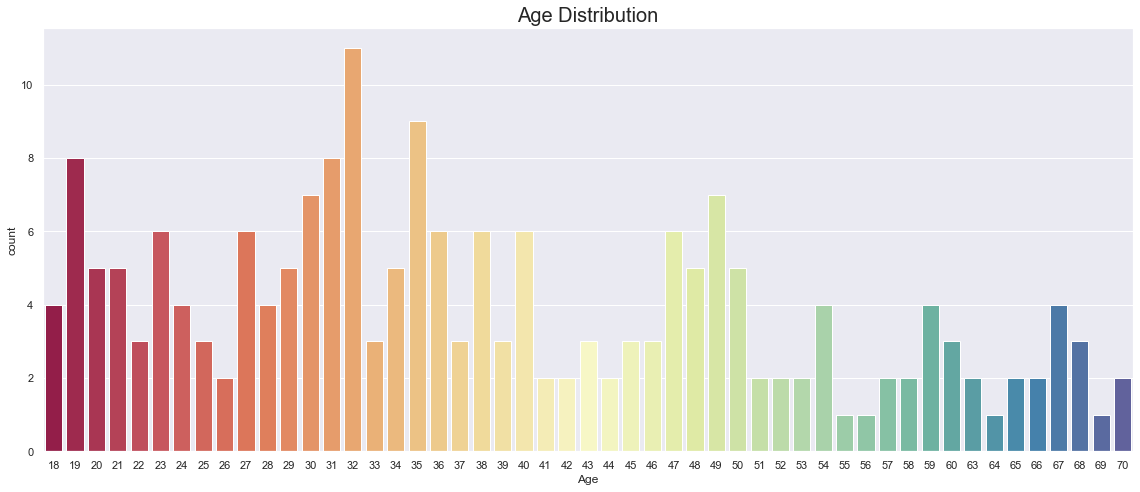

In [10]:
plt.figure(figsize=(16,7))
sns.countplot(x='Age',data=data,palette='Spectral')
plt.title('Age Distribution',fontsize=20)
plt.tight_layout()
plt.show()

* This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

  * By looking at the above graph, It can be seen that the Ages from 27 to 40 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. People of Age 55, 56, 64, 69 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

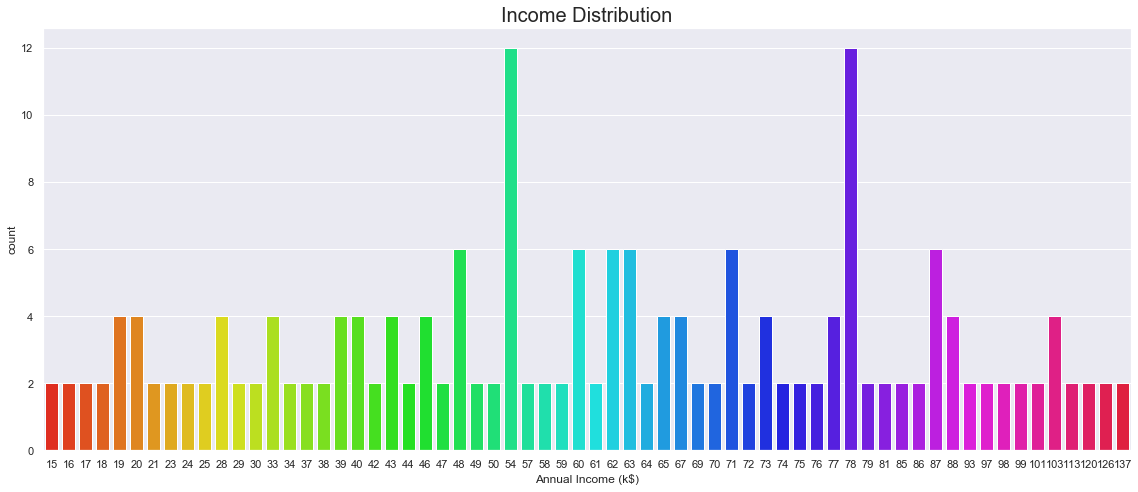

In [11]:
plt.figure(figsize=(16,7))
sns.countplot(x='Annual Income (k$)',data=data,palette='hsv')
plt.title('Income Distribution',fontsize=20)
plt.tight_layout()
plt.show()

* Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78 US Dollars.

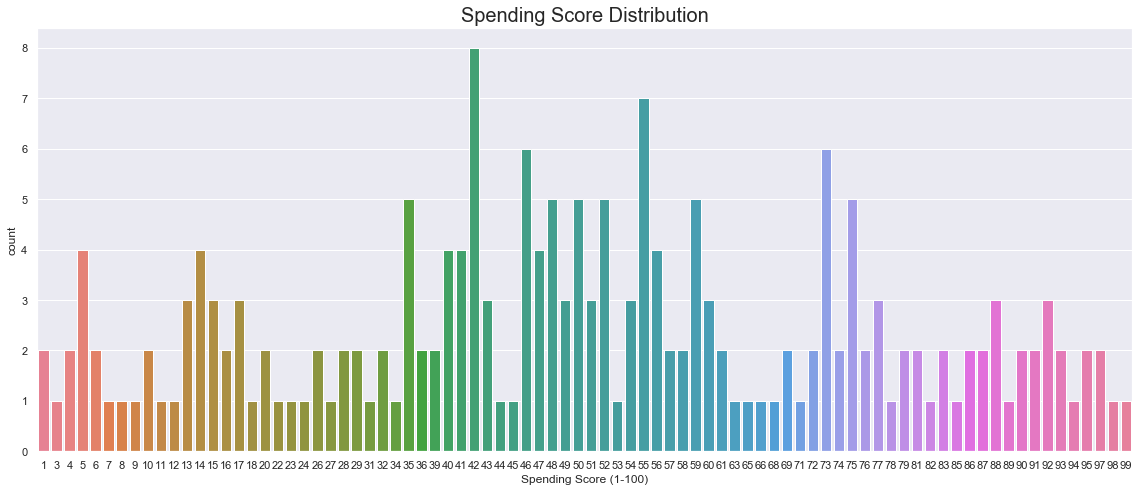

In [12]:
plt.figure(figsize=(16,7))
sns.countplot(x='Spending Score (1-100)',data=data,palette='husl')
plt.title('Spending Score Distribution',fontsize=20)
plt.tight_layout()
plt.show()

* This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

    * On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having 1 spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with varying needs and requirements available in the Mall.

<Figure size 2160x1440 with 0 Axes>

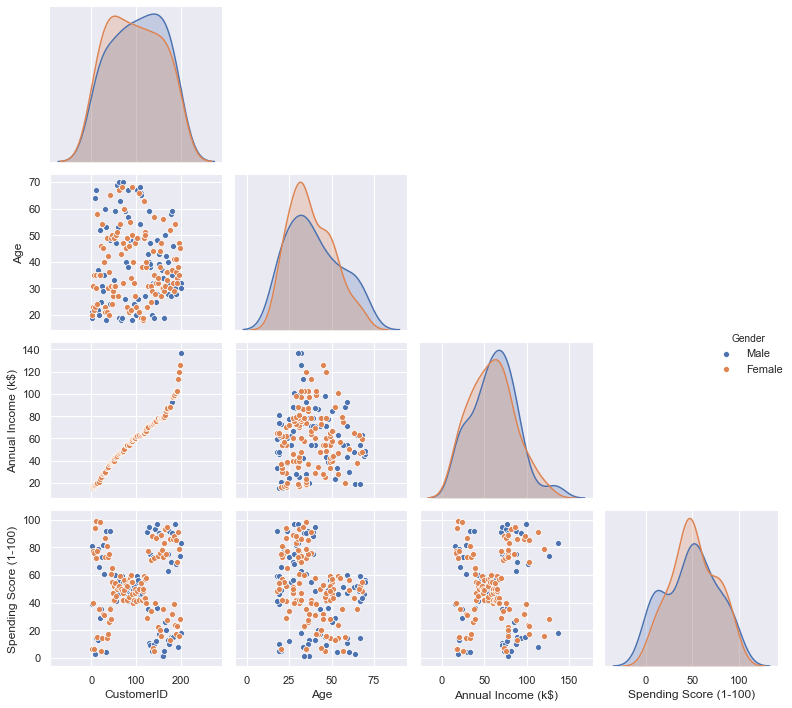

In [13]:
plt.figure(figsize=(30,20))
sns.pairplot(data,hue='Gender',corner=True)
plt.tight_layout()
plt.show()

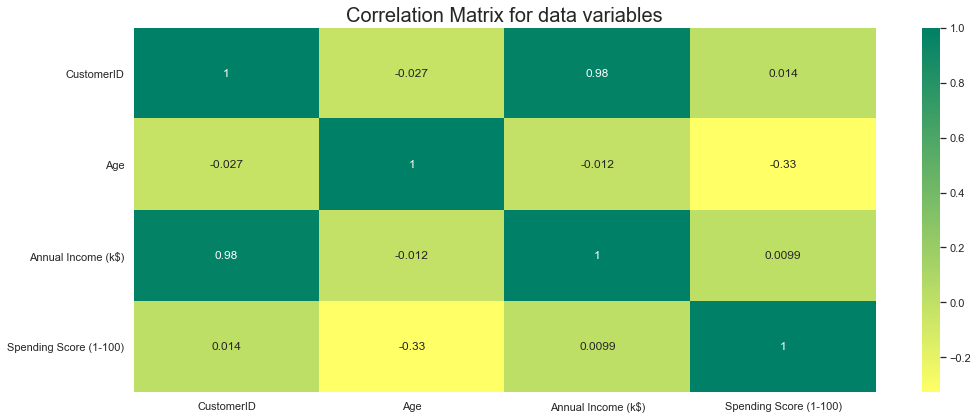

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),cmap='summer_r',annot=True)
plt.title('Correlation Matrix for data variables',fontsize=20)
plt.tight_layout()
plt.show()

* The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset.

* We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.



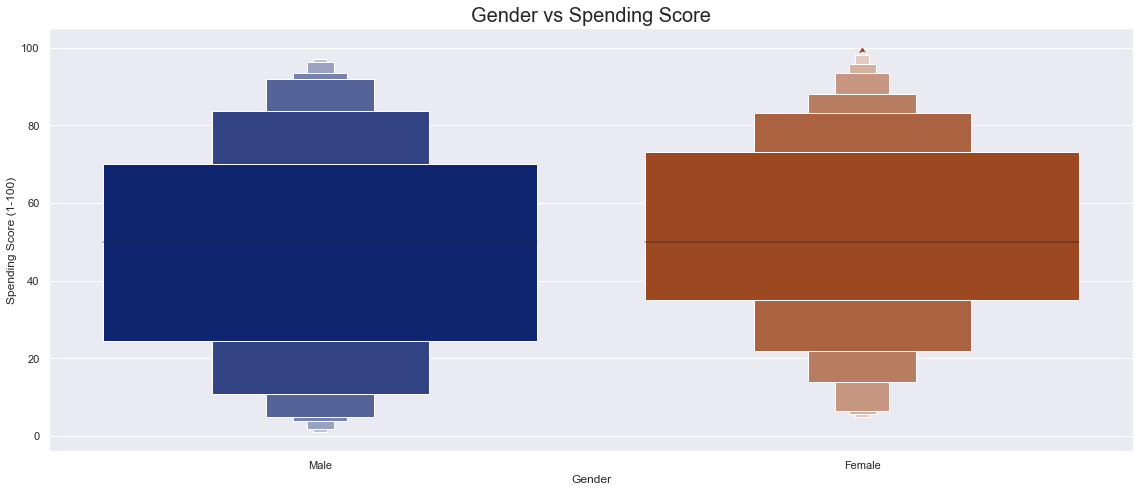

In [15]:
plt.figure(figsize=(16,7))
sns.boxenplot(x='Gender',y='Spending Score (1-100)',data=data,palette='dark')
plt.title('Gender vs Spending Score',fontsize=20)
plt.tight_layout()
plt.show()

* Bi-variate Analysis between Gender and Spending Score,

   * It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.



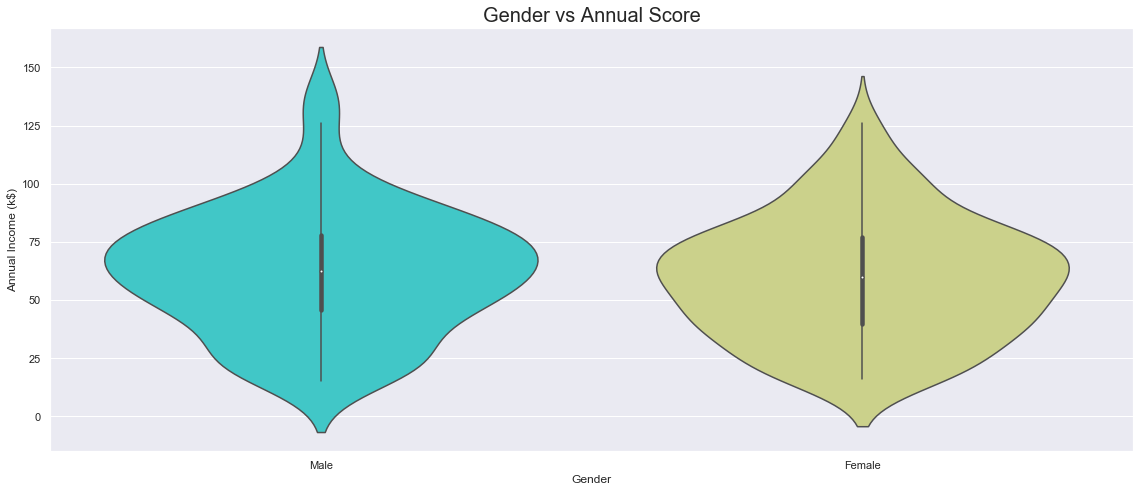

In [16]:
plt.figure(figsize=(16,7))
sns.violinplot(x='Gender',y='Annual Income (k$)',data=data,palette='rainbow')
plt.title('Gender vs Annual Score',fontsize=20)
plt.tight_layout()
plt.show()

* Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

* There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.



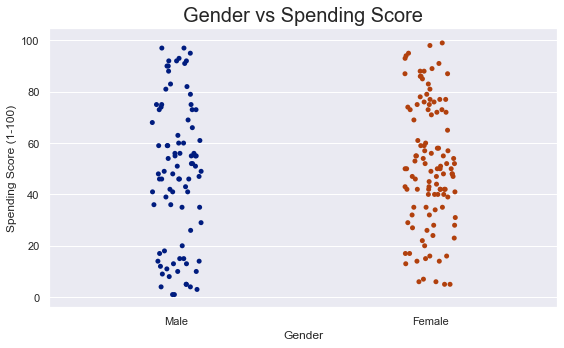

In [17]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Gender',y='Spending Score (1-100)',data=data,palette='dark')
plt.title('Gender vs Spending Score',fontsize=20)
plt.tight_layout()
plt.show()

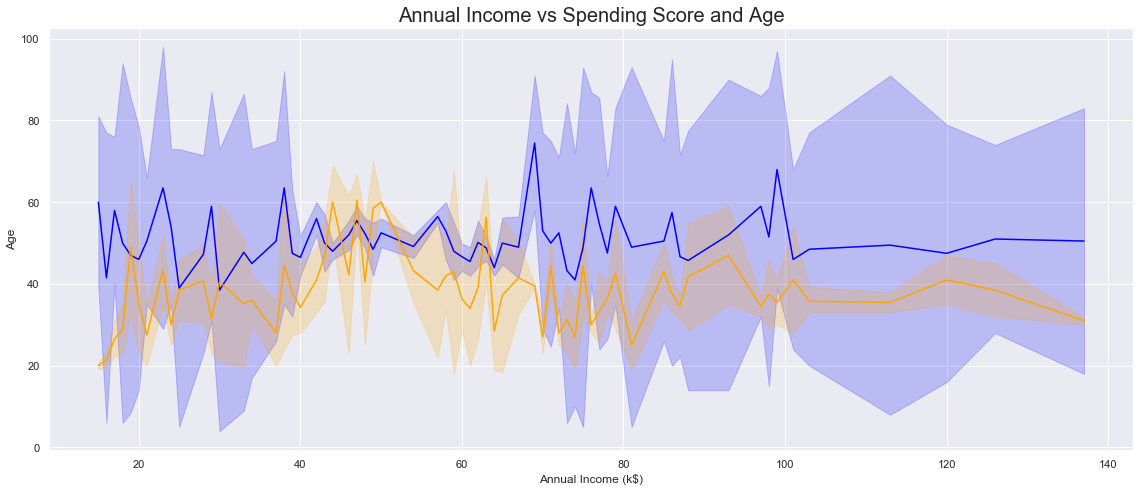

In [18]:
plt.figure(figsize=(16,7))
sns.lineplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,color='blue')
sns.lineplot(x='Annual Income (k$)',y='Age',data=data,color='orange')
plt.title('Annual Income vs Spending Score and Age',fontsize=20)
plt.tight_layout()
plt.show()

* The above Plot Between Annual Income and Age represented by a orange color line, and a plot between Annual Income and the Spending Score represented by a blue color. Shows how Age and Spending Varies with Annual Income.

# Clustering Analysis
## Clusters of Customers Based on their Income

In [19]:
data1=data.iloc[:,[3,4]].values
data1.shape

(200, 2)

### KMeans Algorithm
* In K-means clustering, we seek to partition the
observations into a pre-specified number of clusters.

* The idea behind K-means clustering is that a good
  clustering is one for which the within-cluster variation is as
  small as possible.
  
* K-means clustering requires us to pre-specify the number
  of clusters K.  

**The Elbow Method to find the No. of Optimal Clusters**


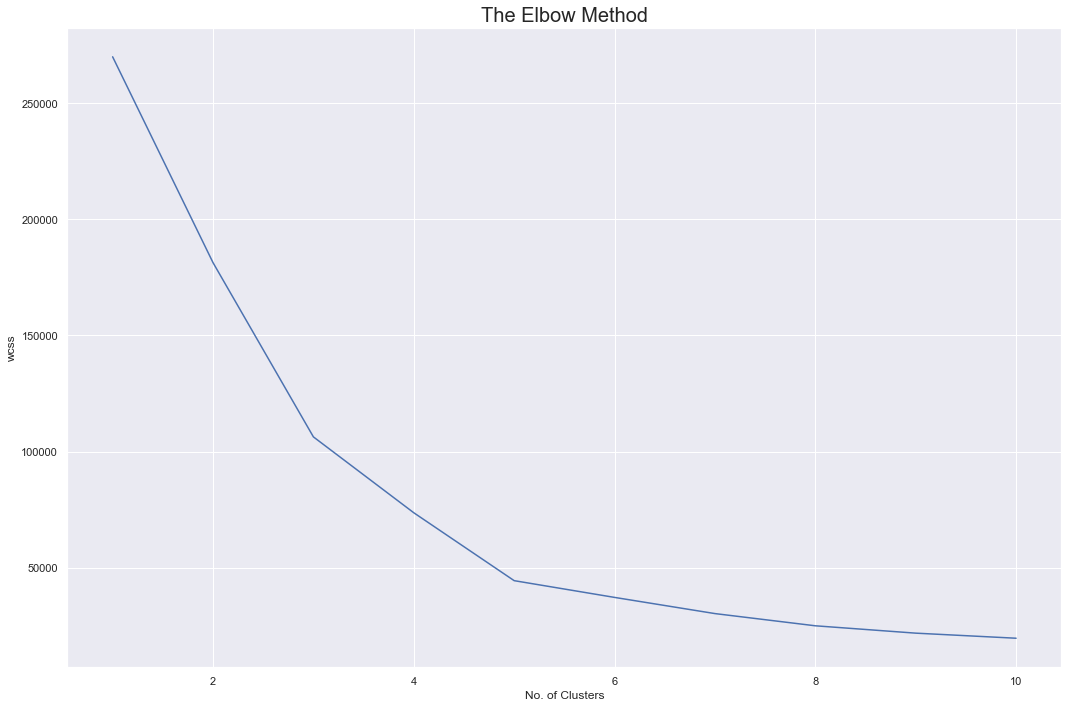

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(data1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.show()

# Visualizing the clusters


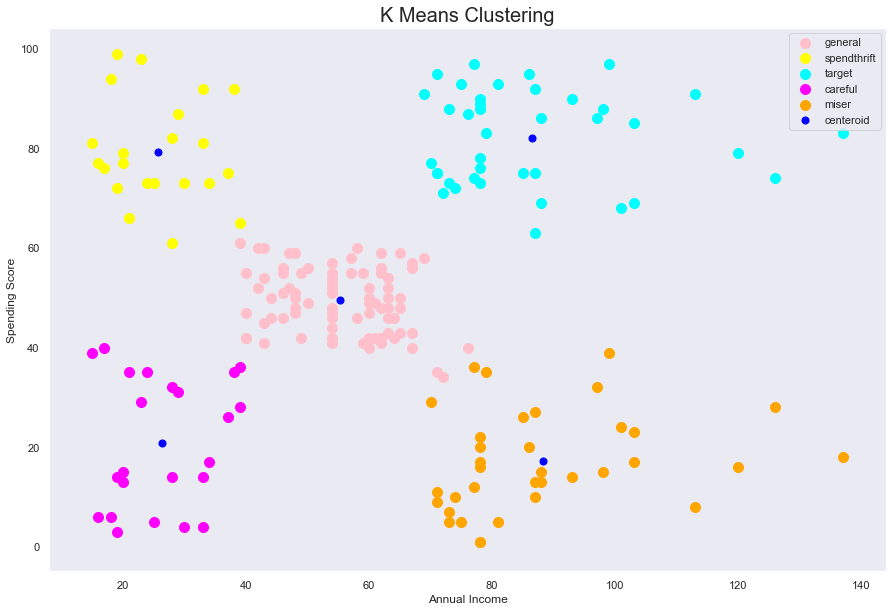

In [21]:
km = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(data1)

plt.scatter(data1[y_means==0,0],data1[y_means==0,1],s=100,c='pink',label='general')
plt.scatter(data1[y_means==1,0],data1[y_means==1,1],s=100,c='yellow',label='spendthrift')
plt.scatter(data1[y_means==2,0],data1[y_means==2,1],s=100,c='cyan',label='target')
plt.scatter(data1[y_means==3,0],data1[y_means==3,1],s=100,c='magenta',label='careful')
plt.scatter(data1[y_means==4,0],data1[y_means==4,1],s=100,c='orange',label='miser')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

* This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best attributes to determine the segments of a customer in a Mall.

## Hierarchical Clustering

* In hierarchical clustering, we do not know in advance how
many clusters we want; in fact, we end up with a tree-like
visual representation of the observations, called a
dendrogram, that allows us to view at once the clusterings
obtained for each possible number of clusters, from 1 to n.
* Hierarchical clustering is an alternative approach which
does not require that we commit to a particular choice of
K.
* Bottom-up or agglomerative
clustering. This is the most common type of hierarchical
clustering, and refers to the fact that a dendrogram is built
starting from the leaves and combining clusters up to the
trunk.
* Start with each point in its own cluster.
  * Identify the closest two clusters and merge them.
  * Repeat.
  * Ends when all points are in a single cluster.

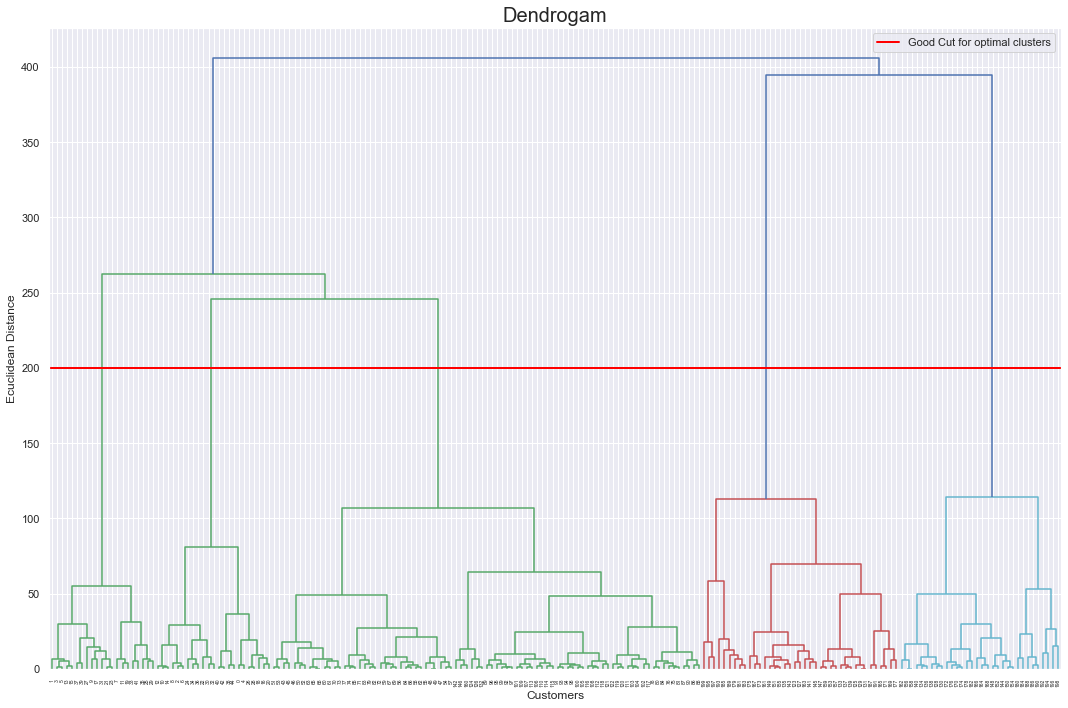

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data1,method='ward'))
sns.lineplot(x=(0,2000),y=200,color='red',linewidth=2,label='Good Cut for optimal clusters')
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.tight_layout()
plt.show()

* So from the above dendrogram we can see that redline would be a good cut to get the optimal no of cluster which is 5

## Visualizing the clusters obtained from hierarchical clustering

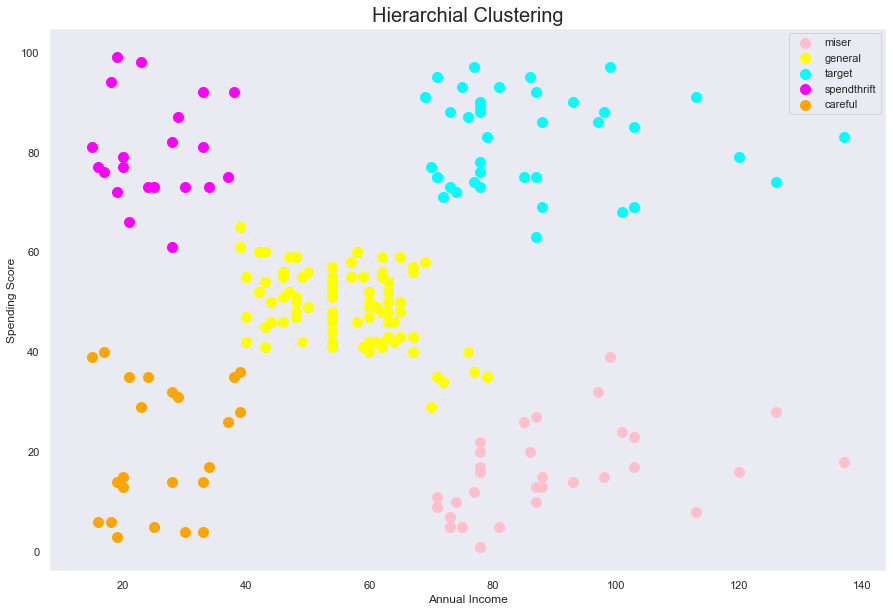

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data1)
plt.scatter(data1[y_hc == 0, 0], data1[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(data1[y_hc == 1, 0], data1[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(data1[y_hc == 2, 0], data1[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(data1[y_hc == 3, 0], data1[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(data1[y_hc == 4, 0], data1[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

##  Clusters of Customers Based on their Age

In [24]:
data2 = data.iloc[:,[2,4]].values

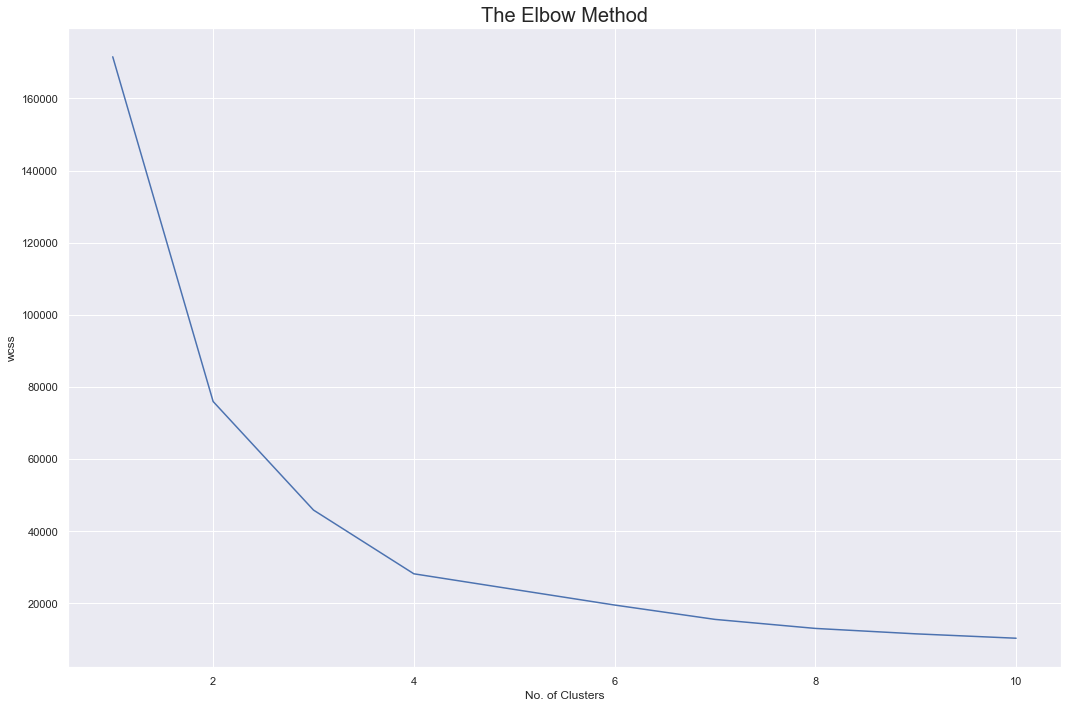

In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(data2)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.show()

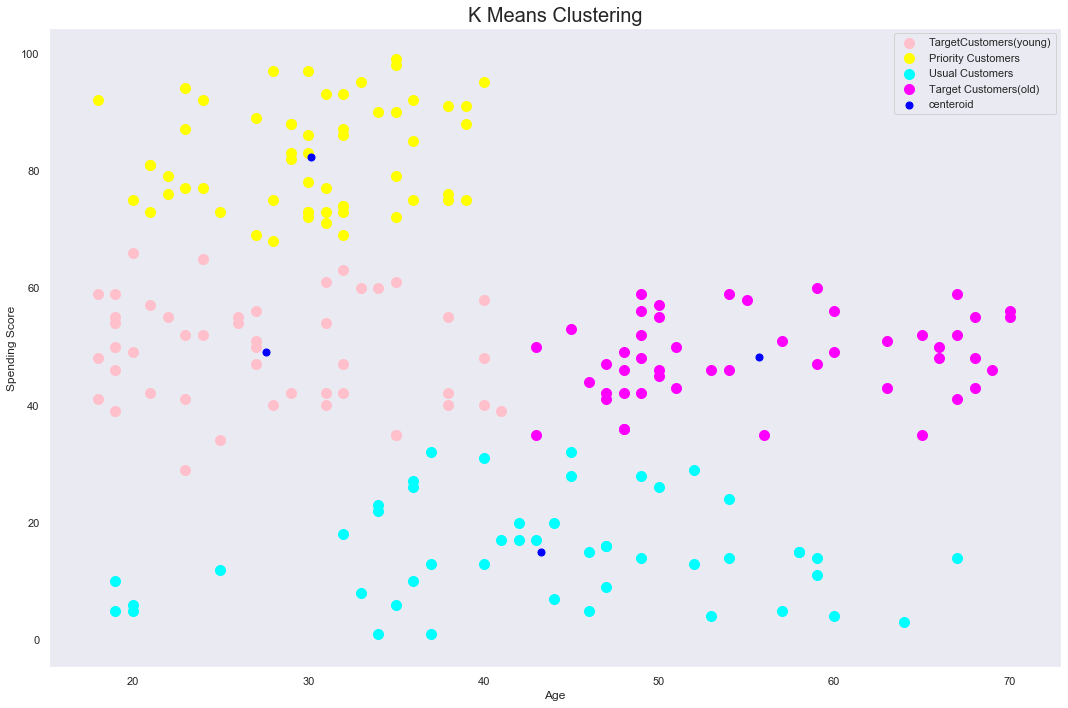

In [26]:
km = KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(data2)

plt.scatter(data2[y_means==0,0],data2[y_means==0,1],s=100,c='pink',label='TargetCustomers(young)')
plt.scatter(data2[y_means==1,0],data2[y_means==1,1],s=100,c='yellow',label='Priority Customers')
plt.scatter(data2[y_means==2,0],data2[y_means==2,1],s=100,c='cyan',label='Usual Customers')
plt.scatter(data2[y_means==3,0],data2[y_means==3,1],s=100,c='magenta',label='Target Customers(old)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

* By looking at the above clustering plot between the age of the customers and their corresponding spending scores,Cutomers can be divided into 4 different categories namely Usual Customers, Priority Customers,Target Customers(young),Target Customers(old). Then after getting the results we can accordingly make different marketing strategies to maximize the benifit for Mall and customer satisfaction.

In [27]:
data3 = data.iloc[:,2:5].values

In [28]:
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
km.fit(data3)
labels=km.labels_
print(labels)
centroids=km.cluster_centers_

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [29]:
data['labels']=labels
trace=go.Scatter3d(x=data['Age'],y=data['Annual Income (k$)'],z=data['Spending Score (1-100)'],mode='markers',
                  marker=dict(color=data['labels'],size=10,line=dict(color=data['labels'],width=12),opacity=0.8))
df=[trace]
layout=go.Layout(title='Age vs Annual Income vs Spending Score',margin=dict(l=0,r=0,b=0,t=0),
                 scene=dict(xaxis=dict(title='Age'),yaxis=dict(title='Annual Income'),zaxis=dict(title='Spending Score')))
fig=go.Figure(data=df,layout=layout)
py.iplot(fig)